In [1]:
from scipy.io import savemat, loadmat, whosmat
pn = '/home/mag/'
expFn = 'cmod_speed_test.mat'

In [15]:
whosmat('/home/mag/cmod_speed_test.mat')

[('compTime_vect_cpu_32', (1, 15), 'double'),
 ('compTime_cpu_16', (1, 15), 'double'),
 ('compTime_cpu_2', (1, 15), 'double'),
 ('compTime_GPU', (1, 15), 'double'),
 ('compTime_cpu_1', (1, 15), 'double'),
 ('compTime_vect_cpu_2', (1, 15), 'double'),
 ('compTime_vect_cpu_1', (1, 15), 'double'),
 ('compTime_cpu_32', (1, 15), 'double'),
 ('compTime_vect_cpu_8', (1, 15), 'double'),
 ('compTime_cpu_8', (1, 15), 'double')]

In [3]:
a = loadmat(pn + expFn)
compTime_cpu_1 = a['compTime_cpu_1'][:][0]
compTime_cpu_2 = a['compTime_cpu_2'][:][0]
compTime_cpu_8 = a['compTime_cpu_8'][:][0]
compTime_cpu_16 = a['compTime_cpu_16'][:][0]
compTime_cpu_32 = a['compTime_cpu_32'][:][0]
compTime_vect_cpu_1 = a['compTime_vect_cpu_1'][:][0]
compTime_vect_cpu_2 = a['compTime_vect_cpu_2'][:][0]
compTime_vect_cpu_8 = a['compTime_vect_cpu_8'][:][0]
compTime_vect_cpu_32 = a['compTime_vect_cpu_32'][:][0]
compTime_GPU = a['compTime_GPU'][:][0]

In [4]:
# We need a special font for the code below.  It can be downloaded this way:
import os
import urllib2
if not os.path.exists('Humor-Sans.ttf'):
    fhandle = urllib2.urlopen('http://antiyawn.com/uploads/Humor-Sans-1.0.ttf')
    open('Humor-Sans.ttf', 'wb').write(fhandle.read())

# Linear CMOD

In [4]:
# for clearing the output in a cell
from IPython.display import clear_output

In [5]:
from numpy import ones
from cmod import rcs2windPar, rcs2wind

In [6]:
# im_var = arange(1e3,2e4,1e3)
# im_var = arange(1e3,1e6,1e5)
im_var = exp(arange(4, 19, 1))
print sqrt(im_var)

[  7.38905610e+00   1.21824940e+01   2.00855369e+01   3.31154520e+01
   5.45981500e+01   9.00171313e+01   1.48413159e+02   2.44691932e+02
   4.03428793e+02   6.65141633e+02   1.09663316e+03   1.80804241e+03
   2.98095799e+03   4.91476884e+03   8.10308393e+03]


In [ ]:
compTime_cpu_1 = []
compTime_cpu_2 = []
compTime_cpu_8 = []
compTime_cpu_32 = []

In [ ]:
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2wind(sar=-0.387*ones((xs,ys)), cmdv=4, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)))
    compTime_cpu_1.append(compTime.best)
    clear_output()

In [ ]:
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2windPar(sar=-0.387*ones((xs,ys)), cmdv=4, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)), nprocs=2)
    compTime_cpu_2.append(compTime.best)
    clear_output()

In [ ]:
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2windPar(sar=-0.387*ones((xs,ys)), cmdv=4, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)), nprocs=8)
    compTime_cpu_8.append(compTime.best)
    clear_output()
    clear_output()

In [ ]:
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2windPar(sar=-0.387*ones((xs,ys)), cmdv=4, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)), nprocs=32)
    compTime_cpu_32.append(compTime.best)
    clear_output()

In [8]:
compTime_cpu_16 = []
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2windPar(sar=-0.387*ones((xs,ys)), cmdv=4, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)), nprocs=16)
    compTime_cpu_16.append(compTime.best)
    clear_output()
compTime_cpu_16 = array(compTime_cpu_16)

In [ ]:
compTime_cpu_1 = array(compTime_cpu_1)
compTime_cpu_2 = array(compTime_cpu_2)
compTime_cpu_8 = array(compTime_cpu_8)
compTime_cpu_32 = array(compTime_cpu_32)

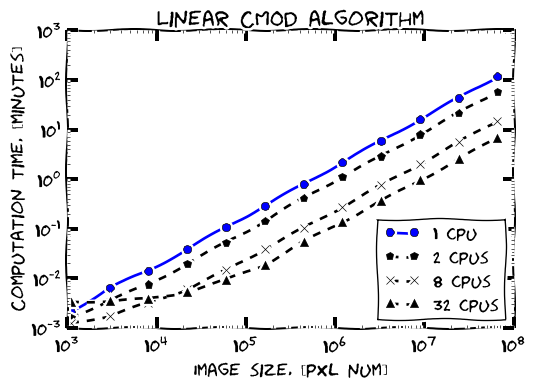

In [28]:
close('all')
plt.xkcd()
hold
plt.loglog(im_var[3:],compTime_cpu_1[3:]/60, 'o-', label="1 cpu")
plt.loglog(im_var[3:],compTime_cpu_2[3:]/60, 'p--k', label="2 cpus")
plt.loglog(im_var[3:],compTime_cpu_8[3:]/60, 'x--k', label="8 cpus")
plt.loglog(im_var[3:],compTime_cpu_32[3:]/60, '^--k', label="32 cpus")
plt.legend(loc=4,prop={'size':13})
plt.ylabel("Computation time, [minutes]")
plt.xlabel("Image size, [pxl num]")
plt.title("Linear CMOD algorithm")

plt.savefig('linear_algo_time.png', facecolor='w', edgecolor='w', \
                dpi=300, bbox_inches="tight", pad_inches=0.1)

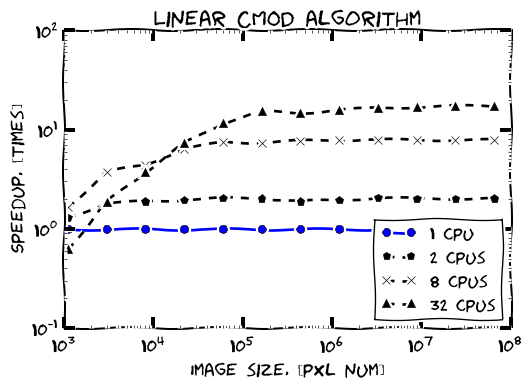

In [31]:
close('all')
plt.xkcd()
hold
plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_cpu_1[3:], 'o-', label="1 cpu")
plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_cpu_2[3:], 'p--k', label="2 cpus")
plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_cpu_8[3:], 'x--k', label="8 cpus")
plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_cpu_32[3:], '^--k', label="32 cpus")
plt.legend(loc=4,prop={'size':13})
plt.ylabel("Speedup, [times]")
plt.xlabel("Image size, [pxl num]")
plt.title("Linear CMOD algorithm")

plt.savefig('linear_algo_speedup.png', facecolor='w', edgecolor='w', \
                dpi=300, bbox_inches="tight", pad_inches=0.1)

# Vectorized CMOD

In [ ]:
import cmod_vect
reload(cmod_vect)
from cmod_vect import rcs2windPar, rcs2wind

In [ ]:
compTime_vect_cpu_1 = []
compTime_vect_cpu_2 = []
compTime_vect_cpu_8 = []
compTime_vect_cpu_32 = []

In [ ]:
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2wind(sar=-0.387*ones((xs,ys)), cmdv=5, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)))
    compTime_vect_cpu_1.append(compTime.best)
    clear_output()

In [ ]:
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2windPar(sar=-0.387*ones((xs,ys)), cmdv=5, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)), nprocs=2)
    compTime_vect_cpu_2.append(compTime.best)
    clear_output()

In [ ]:
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2windPar(sar=-0.387*ones((xs,ys)), cmdv=5, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)), nprocs=8)
    compTime_vect_cpu_8.append(compTime.best)
    clear_output()

In [ ]:
compTime_vect_cpu_32 = []
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2windPar(sar=-0.387*ones((xs,ys)), cmdv=5, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)), nprocs=32)
    compTime_vect_cpu_32.append(compTime.best)
    clear_output()

In [ ]:
compTime_vect_cpu_1 = array(compTime_vect_cpu_1)
compTime_vect_cpu_2 = array(compTime_vect_cpu_2)
compTime_vect_cpu_8 = array(compTime_vect_cpu_8)
compTime_vect_cpu_32 = array(compTime_vect_cpu_32)

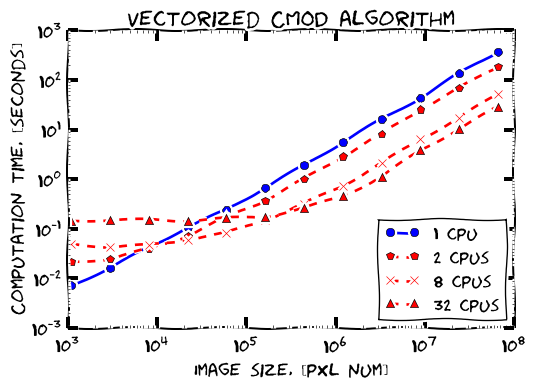

In [32]:
close('all')
plt.xkcd()
hold
plt.loglog(im_var[3:],compTime_vect_cpu_1[3:], 'o-', label="1 cpu")
plt.loglog(im_var[3:],compTime_vect_cpu_2[3:], 'p--r', label="2 cpus")
plt.loglog(im_var[3:],compTime_vect_cpu_8[3:], 'x--r', label="8 cpus")
plt.loglog(im_var[3:],compTime_vect_cpu_32[3:], '^--r', label="32 cpus")
plt.legend(loc=4,prop={'size':13})
plt.ylabel("Computation time, [seconds]")
plt.xlabel("Image size, [pxl num]")
plt.title("Vectorized CMOD algorithm")

plt.savefig('vect_algo_time.png', facecolor='w', edgecolor='w', \
                dpi=300, bbox_inches="tight", pad_inches=0.1)

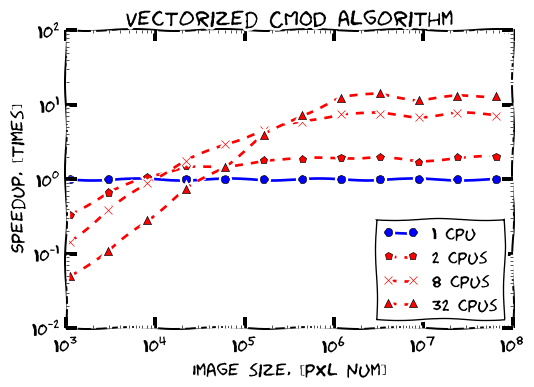

In [47]:
close('all')
plt.xkcd()
hold
plt.loglog(im_var[3:],compTime_vect_cpu_1[3:]/compTime_vect_cpu_1[3:], 'o-', label="1 cpu")
plt.loglog(im_var[3:],compTime_vect_cpu_1[3:]/compTime_vect_cpu_2[3:], 'p--r', label="2 cpus")
plt.loglog(im_var[3:],compTime_vect_cpu_1[3:]/compTime_vect_cpu_8[3:], 'x--r', label="8 cpus")
plt.loglog(im_var[3:],compTime_vect_cpu_1[3:]/compTime_vect_cpu_32[3:], '^--r', label="32 cpus")
plt.legend(loc=4,prop={'size':13})
plt.ylabel("Speedup, [times]")
plt.xlabel("Image size, [pxl num]")
plt.title("Vectorized CMOD algorithm")

plt.savefig('vect_algo_speedup.png', facecolor='w', edgecolor='w', \
                dpi=300, bbox_inches="tight", pad_inches=0.1)

# GPU

In [ ]:
import cmod_gpu
reload(cmod_gpu)
from cmod_gpu import rcs2windOpenCl

In [ ]:
compTime_GPU = []

In [ ]:
for im_size in im_var:
    xs = sqrt(im_size)
    ys = xs
    compTime = %timeit -n 1 -r 2 -o -q \
    test = rcs2windOpenCl(sar=-0.387*ones((xs,ys)), windir=0*ones((xs,ys)), theta=20*ones((xs,ys)))
    compTime_GPU.append(compTime.best)
    clear_output()

In [ ]:
compTime_GPU = array(compTime_GPU)

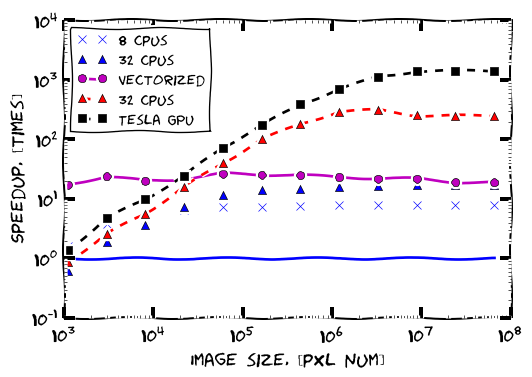

In [46]:
close('all')
plt.figure()
plt.xkcd()
hold
plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_cpu_1[3:], '-b')
# plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_cpu_2[3:], 'pb', label="2 cpus")
plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_cpu_8[3:], 'xb', label="8 cpus")
plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_cpu_32[3:], '^b', label="32 cpus")

plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_vect_cpu_1[3:], 'o-m', label="vectorized")

# plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_vect_cpu_2[3:], 'p--r', label="2 cpus")
# plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_vect_cpu_8[3:], 'x--r', label="8 cpus")
plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_vect_cpu_32[3:], '^--r', label="32 cpus")

plt.loglog(im_var[3:],compTime_cpu_1[3:]/compTime_GPU[3:], 's--k', label="Tesla GPU")

# plt.legend(loc=4,prop={'size':13}, bbox_to_anchor=(1.5,0))
plt.legend(loc=2,prop={'size':11})
plt.ylabel("Speedup, [times]")
plt.xlabel("Image size, [pxl num]")

plt.savefig('GPU-speedup.png', facecolor='w', edgecolor='w', \
                dpi=600, bbox_inches="tight", pad_inches=0.1)

In [127]:
print compTime_cpu_1[-1]/60, compTime_cpu_2[-1]/60, compTime_cpu_8[-1]/60, compTime_cpu_16[-1]/60, compTime_cpu_32[-1]/60
print compTime_vect_cpu_1[-1]/60, compTime_vect_cpu_2[-1]/60, compTime_vect_cpu_8[-1]/60, compTime_vect_cpu_32[-1]/60
print compTime_GPU[-1]/60

117.948514136 58.2304243167 15.0328798493 8.71009406646 6.7863408486
6.22133686543 3.09230088393 0.867026213805 0.477931551139
0.08202308019


In [126]:
print compTime_cpu_1[-1]/compTime_cpu_1[-1], compTime_cpu_1[-1]/compTime_cpu_2[-1], compTime_cpu_1[-1]/compTime_cpu_8[-1], compTime_cpu_1[-1]/compTime_cpu_16[-1], compTime_cpu_1[-1]/compTime_cpu_32[-1]
print compTime_cpu_1[-1]/compTime_vect_cpu_1[-1], compTime_cpu_1[-1]/compTime_vect_cpu_2[-1], compTime_cpu_1[-1]/compTime_vect_cpu_8[-1], compTime_cpu_1[-1]/compTime_vect_cpu_32[-1]
print compTime_cpu_1[-1]/compTime_GPU[-1]

1.0 2.02554790764 7.84603584398 13.5415890157 17.3802814752
18.9587088253 38.1426383017 136.038002378 246.789553556
1437.99176844


In [50]:
compTime_cpu_1/60, compTime_GPU

(array([  1.14134947e-04,   3.24666500e-04,   8.99414221e-04,
          2.10416714e-03,   6.53386513e-03,   1.42630657e-02,
          3.87310505e-02,   1.07805582e-01,   2.89336248e-01,
          7.94149800e-01,   2.18484707e+00,   5.92486170e+00,
          1.60401006e+01,   4.34979401e+01,   1.17948514e+02]),
 array([ 0.09243822,  0.08309817,  0.08924294,  0.0921638 ,  0.08329701,
         0.08612895,  0.09506202,  0.08837104,  0.10103393,  0.12241006,
         0.18940091,  0.31439805,  0.6867609 ,  1.88566279,  4.92138481]))

# Larger Image: GPU vs vectorized/linear

In [ ]:
im_size = 1e8
xs = sqrt(im_size)
ys = xs

compTime = %timeit -n 1 -r 2 -o -q \
test = rcs2wind(sar=-0.387*ones((xs,ys)), cmdv=4, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)))
compTime_cpu_1_large = compTime.best

In [ ]:
compTime = %timeit -n 1 -r 2 -o -q \
test = rcs2windPar(sar=-0.387*ones((xs,ys)), cmdv=5, windir=0*ones((xs,ys)), theta=20*ones((xs,ys)), nprocs=1)
compTime_vect_cpu_1_large = compTime.best

In [ ]:
compTime = %timeit -n 1 -r 2 -o -q \
test = rcs2windOpenCl(sar=-0.387*ones((xs,ys)), windir=0*ones((xs,ys)), theta=20*ones((xs,ys)))
compTime_GPU_large=compTime.best

In [ ]:
compTime_vect_cpu_1_large/compTime_GPU_large

In [ ]:
compTime_cpu_1_large/compTime_GPU_large

# Plotting with Plotly

In [26]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('magican', '5di4fue0lf')

In [27]:
xx = 4

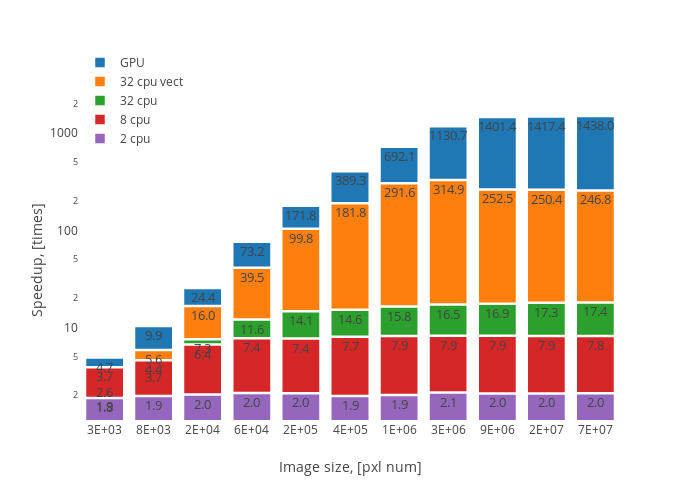

In [42]:
# Define a trace-generating function (returns a Bar object)
def make_trace(x_, y_, name):
    return Bar(
        x=x_,       # (!) x-coords are the summer month names (global variable)
        y=y_,            # take in the y-coordinates
        name=name,      # label for legend/hover
        marker=Marker(
            line=Line(
                color = 'white',  # set bar border color
                width = 2.5      # set bar border width
            )
        )
    )

# Define an annotation-generating function
def make_annotation(x_, y_):         
    return Annotation(
        text=str(round(y_,1)),     # text is the y-coord
        showarrow=False, # annotation w/o arrows, default is True
        x=x_,              # set x position
        xref='x',          # position text horizontally with x-coords
        xanchor='center',  # x position corresp. to center of text
        yref='y',          # set y position 
        yanchor='top',     # position text vertically with y-coords
        y=log10(y_),              # y position corresp. to top of text
        font=Font(
#             color='#262626',  # set font color
            size=13           #   and size
            
        )
    )

# (1) Make Data object using make_trace()
data = Data([
    make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_GPU[xx:],'GPU'),
    make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_vect_cpu_32[xx:],'32 cpu vect'),
#     make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_vect_cpu_1[xx:],'1 cpu vect'),
    make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_32[xx:],'32 cpu'),
    make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_8[xx:],'8 cpu'),
    make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_2[xx:],'2 cpu'),
#     make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_1[xx:],'1 cpu'),
])

# Make Annotations object (list-like) with make_annotation()
annotations = Annotations(
    [make_annotation(x,y) for x,y in zip(xrange(0,len(im_var[xx:])),compTime_cpu_1[xx:]/compTime_GPU[xx:])] +
    [make_annotation(x,y) for x,y in zip(xrange(0,len(im_var[xx:])),compTime_cpu_1[xx:]/compTime_vect_cpu_32[xx:])] +
#     [make_annotation(x,y) for x,y in zip(xrange(0,len(im_var[xx:])),compTime_cpu_1[xx:]/compTime_vect_cpu_1[xx:])] +
    [make_annotation(x,y) for x,y in zip(xrange(0,len(im_var[xx:])),compTime_cpu_1[xx:]/compTime_cpu_32[xx:])] +
    [make_annotation(x,y) for x,y in zip(xrange(0,len(im_var[xx:])),compTime_cpu_1[xx:]/compTime_cpu_8[xx:])] +
    [make_annotation(x,y) for x,y in zip(xrange(0,len(im_var[xx:])),compTime_cpu_1[xx:]/compTime_cpu_2[xx:])]
#     [make_annotation(x,y) for x,y in zip(xrange(0,len(im_var[xx:])),compTime_cpu_1[xx:]/compTime_cpu_1[3xx:])]
)

# title = 'speedup_plot'  # plot's title  

# (2) Make Layout object
layout = Layout(
    barmode='overlay',  # (!) bars are overlaid on this plot
#     title=title,        # set plot title
    yaxis=YAxis(
        zeroline=True,          # no thick y=0 line
        showgrid=False,          # no horizontal grid lines
        showticklabels=True,     # no y-axis tick labels
        type='log',
        autorange=True,
        title="Speedup, [times]"
    ),
    xaxis=XAxis(
        type='category',
#         autorange=True,
        title="Image size, [pxl num]"
    ),
    legend=Legend(
        x=0,     # set legend x position in norm. plotting area coord.  
        y=1,     # set legend y postion in " " " "
        yanchor='middle'   # y position corresp. to middle of text
    ),
    annotations=annotations # link the Annotations object
)

# (3) Make Figure object
fig_gpu_speedup_bar = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig_gpu_speedup_bar, filename='gpu_speedup_bar')
# plot_url = py.plot(fig, filename='gpu_speedup_bar')

In [44]:
# Saving static image
py.image.save_as(fig_gpu_speedup_bar, 'gpu_speedup_bar.png')

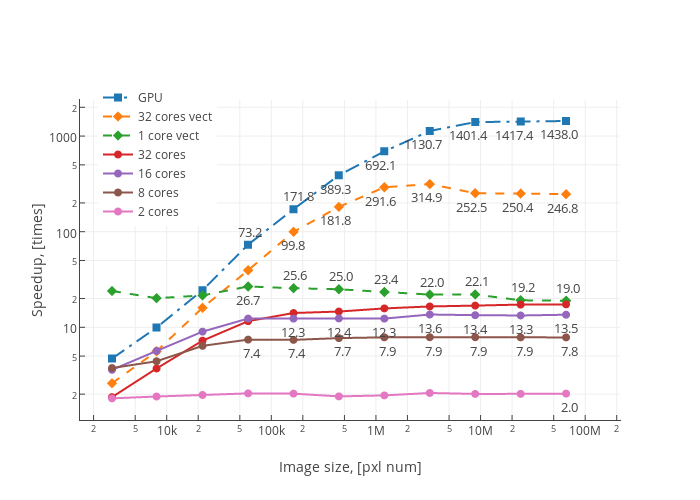

In [124]:
# Define a trace-generating function
def make_trace(x_, y_, name, symbol_, dash_):
    return Scatter(
        x=x_,       # (!) x-coords are the summer month names (global variable)
        y=y_,       # take in the y-coordinates
        name=name,  # label for legend/hover
        mode='markers+lines',
        marker=Marker(
            size=8,
            symbol=symbol_,
            maxdisplayed=0
        ),
        line=Line(
            dash=dash_
        )
    )

# Define an annotation-generating function
def make_annotation(x_, y_):         
    return Annotation(
        text=str(round(y_,1)),     # text is the y-coord
        showarrow=False, # annotation w/o arrows, default is True
        x=log10(x_*1.3),              # set x position
        xref='x',          # position text horizontally with x-coords
        xanchor='right',  # x position corresp. to center of text
        yref='y',          # set y position 
        yanchor='top',     # position text vertically with y-coords
        y=log10(y_*0.9),              # y position corresp. to top of text
        font=Font(
            size=13,        #   and size
        )
    )

def make_annotation_above(x_, y_):         
    return Annotation(
        text=str(round(y_,1)),     # text is the y-coord
        showarrow=False, # annotation w/o arrows, default is True
        x=log10(x_*0.8),              # set x position
        xref='x',          # position text horizontally with x-coords
        xanchor='left',  # x position corresp. to center of text
        yref='y',          # set y position 
        yanchor='top',     # position text vertically with y-coords
        y=log10(y_*1.7),              # y position corresp. to top of text
        font=Font(
            size=13,        #   and size
        )
    )


# (1) Make Data object using make_trace()
data = Data([
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_GPU[xx:],'GPU', 'square', 'longdashdot'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_vect_cpu_32[xx:],'32 cores vect', 'diamond', 'dash'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_vect_cpu_1[xx:],'1 core vect', 'diamond', 'dash'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_32[xx:],'32 cores', 'circle', 'line'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_16[xx:],'16 cores', 'circle', 'line'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_8[xx:],'8 cores', 'circle', 'line'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_2[xx:],'2 cores', 'circle', 'line'),
#     make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_1[xx:],'1 cpu'),
])

# Make Annotations object (list-like) with make_annotation()
annotations = Annotations(
    [make_annotation_above(x,y) for x,y in zip(im_var[xx+3:xx+5],compTime_cpu_1[xx+3:xx+5]/compTime_GPU[xx+3:xx+5])] +
    [make_annotation(x,y) for x,y in zip(im_var[xx+5:],compTime_cpu_1[xx+5:]/compTime_GPU[xx+5:])] +
    [make_annotation(x,y) for x,y in zip(im_var[xx+4:],compTime_cpu_1[xx+4:]/compTime_vect_cpu_32[xx+4:])] +
    [make_annotation(im_var[xx+3],compTime_cpu_1[xx+3]/compTime_vect_cpu_1[xx+3])] +
    [make_annotation_above(x,y) for x,y in zip(im_var[xx+4:],compTime_cpu_1[xx+4:]/compTime_vect_cpu_1[xx+4:])] +
#     [make_annotation(x,y) for x,y in zip(im_var[xx+3:],compTime_cpu_1[xx+3:]/compTime_cpu_32[xx+3:])] +
    [make_annotation(x,y) for x,y in zip(im_var[xx+4:],compTime_cpu_1[xx+4:]/compTime_cpu_16[xx+4:])] +
    [make_annotation(x,y) for x,y in zip(im_var[xx+3:],compTime_cpu_1[xx+3:]/compTime_cpu_8[xx+3:])] +
    [make_annotation(im_var[-1],compTime_cpu_1[-1]/compTime_cpu_2[-1])]
#     [make_annotation(x,y) for x,y in zip(xrange(0,len(im_var[xx:])),compTime_cpu_1[xx:]/compTime_cpu_1[3xx:])]
)

# title = 'speedup_plot'  # plot's title  

# (2) Make Layout object
layout = Layout(
    barmode='overlay',  # (!) bars are overlaid on this plot
#     title=title,        # set plot title
    yaxis=YAxis(
        type='log',
        autorange=True,
        showline=True,
        ticks='inside',
        title="Speedup, [times]"
    ),
    xaxis=XAxis(
        type='log',
        autorange=True,
        showline=True,
        ticks='inside',
        title="Image size, [pxl num]"
    ),
    legend=Legend(
        x=0.033,    # set legend x position in norm. plotting area coord.  
        y=0.83,     # set legend y postion in " " " "
        yanchor='middle'   # y position corresp. to middle of text
    ),
    annotations=annotations # link the Annotations object
)

# (3) Make Figure object
fig_gpu_speedup = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig_gpu_speedup, filename='gpu_speedup')
# plot_url = py.plot(fig, filename='gpu_speedup')

In [125]:
# Saving static image
py.image.save_as(fig_gpu_speedup, 'gpu_speedup.pdf')

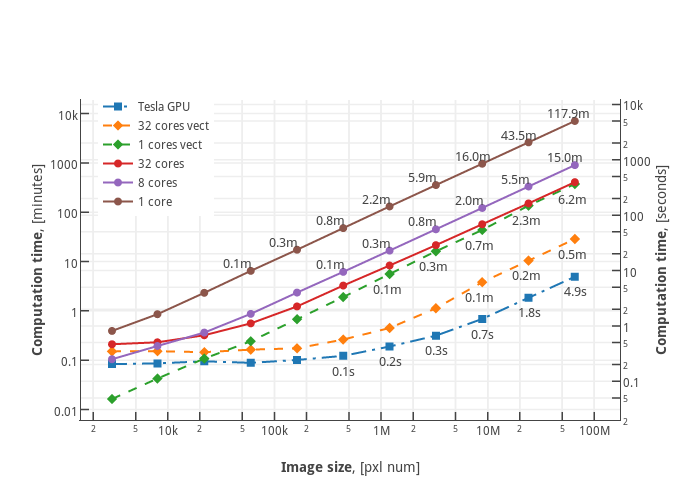

In [115]:
# Define a trace-generating function
def make_trace(x_, y_, name, symbol_, dash_):
    return Scatter(
        x=x_,       # (!) x-coords are the summer month names (global variable)
        y=y_,       # take in the y-coordinates
        name=name,  # label for legend/hover
        mode='markers+lines',
        marker=Marker(
            size=8,
            symbol=symbol_,
            maxdisplayed=0
        ),
        line=Line(
            dash=dash_
        )
    )

def make_trace_2(x_, y_, name, symbol_, dash_):
    return Scatter(
        x=x_,       # (!) x-coords are the summer month names (global variable)
        y=y_,       # take in the y-coordinates
        name=name,  # label for legend/hover
        mode='markers+lines',
        marker=Marker(
            size=8,
            symbol=symbol_,
            maxdisplayed=0
        ),
        line=Line(
            dash=dash_
        ),
        yaxis='y2'
    )


# Define an annotation-generating function
def make_annotation_min(x_, y_):         
    return Annotation(
#         text=str(round(y_/60,2)) + ' (' + str(round(y_,1)) + ')',     # text is the y-coord
        text=str(round(y_/60,1)) + 'm',     # text is the y-coord
        showarrow=False, # annotation w/o arrows, default is True
        x=log10(x_*1.3),              # set x position
        xref='x',          # position text horizontally with x-coords
        xanchor='right',  # x position corresp. to center of text
        yref='y',          # set y position 
        yanchor='top',     # position text vertically with y-coords
        y=log10(y_*0.7),              # y position corresp. to top of text
        font=Font(
            size=13,        #   and size
        )
    )

def make_annotation_min_above(x_, y_):         
    return Annotation(
#         text=str(round(y_/60,2)) + ' (' + str(round(y_,1)) + ')',     # text is the y-coord
        text=str(round(y_/60,1)) + 'm',     # text is the y-coord
        showarrow=False, # annotation w/o arrows, default is True
        x=log10(x_*0.55),              # set x position
        xref='x',          # position text horizontally with x-coords
        xanchor='left',  # x position corresp. to center of text
        yref='y',          # set y position 
        yanchor='top',     # position text vertically with y-coords
        y=log10(y_*2),              # y position corresp. to top of text
        font=Font(
            size=13,        #   and size
        )
    )


def make_annotation_sec(x_, y_):         
    return Annotation(
        text=str(round(y_,1)) + 's',     # text is the y-coord
        showarrow=False, # annotation w/o arrows, default is True
        x=log10(x_*1.3),              # set x position
        xref='x',          # position text horizontally with x-coords
        xanchor='right',  # x position corresp. to center of text
        yref='y',          # set y position 
        yanchor='top',     # position text vertically with y-coords
        y=log10(y_*0.7),              # y position corresp. to top of text
        font=Font(
            size=13,        #   and size
#             weight='bold'
        )
    )


# (1) Make Data object using make_trace()
data = Data([
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_GPU[xx:],'Tesla GPU', 'square', 'longdashdot'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_vect_cpu_32[xx:],'32 cores vect', 'diamond', 'dash'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_vect_cpu_1[xx:],'1 cores vect', 'diamond', 'dash'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_32[xx:],'32 cores', 'circle', 'line'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_8[xx:],'8 cores', 'circle', 'line'),
    make_trace([(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:],'1 core', 'circle', 'line'),
#     make_trace(["%.E" %(round(x,-3)) for x in (im_var[xx:])], compTime_cpu_1[xx:]/compTime_cpu_1[xx:],'1 cpu'),
])

# Make Annotations object (list-like) with make_annotation()
annotations = Annotations(
    [make_annotation_sec(x,y) for x,y in zip(im_var[xx+5:],compTime_GPU[xx+5:])] +
    [make_annotation_min(x,y) for x,y in zip(im_var[xx+6:],compTime_vect_cpu_1[xx+6:])] +
    [make_annotation_min(x,y) for x,y in zip(im_var[xx+8:],compTime_vect_cpu_32[xx+8:])] +
    [make_annotation_min_above(x,y) for x,y in zip(im_var[xx+3:],compTime_cpu_1[xx+3:])] + 
    [make_annotation_min_above(x,y) for x,y in zip(im_var[xx+5:],compTime_cpu_8[xx+5:])]
)

# title = 'speedup_plot'  # plot's title  

# (2) Make Layout object
layout = Layout(
    barmode='overlay',  # (!) bars are overlaid on this plot
#     title=title,        # set plot title
    yaxis=YAxis(
        type='log',
        autorange=True,
        showline=True,
        range = [1e-3, 200],
        ticks='inside',
        title="<b>Computation time</b>, [minutes]",

        dtick=2,
        ticklen=8,
        tickwidth=1.5,
        tickcolor='#444',
        tickangle='auto',
        exponentformat='B',
        showexponent='all',
        mirror=False,
        gridwidth=1.5,
        zerolinecolor='#444',
        zerolinewidth=1,
        linecolor='#444',
        linewidth=1,
        anchor='y',
        overlaying=False,
        position=0
    ),
    yaxis2=YAxis(
        type='log',
        autorange=True,
        showline=True,
        range=[log10(2e-2), log10(1.2e4)],
        ticks='inside',
        title="<b>Computation time</b>, [seconds]",
        overlaying='y',
        side='right',

        dtick=2,
        ticklen=8,
        tickwidth=1.5,
        tickcolor='#444',
        tickangle='auto',
        exponentformat='B',
        showexponent='all',
        mirror=False,
        gridwidth=1.5,
        zerolinecolor='#444',
        zerolinewidth=1,
        linecolor='#444',
        linewidth=1,
        anchor='y'
    ),
    xaxis=XAxis(
        type='log',
        autorange=True,
        showline=True,
        ticks='inside',
        title="<b>Image size</b>, [pxl num]",

        dtick=2,
        ticklen=8,
        tickwidth=1.5,
        tickcolor='#444',
        tickangle='auto',
        exponentformat='B',
        showexponent='all',
        mirror=False,
        gridwidth=1.5,
        zerolinecolor='#444',
        zerolinewidth=1,
        linecolor='#444',
        linewidth=1,
        anchor='y',
        overlaying=False,
        position=0
    ),
    legend=Legend(
        x=0.033,    # set legend x position in norm. plotting area coord.  
        y=0.83,     # set legend y postion in " " " "
        yanchor='middle'   # y position corresp. to middle of text
    ),
    font=Font(
        family='Droid Sans, sans-serif',
        size=12,
        color='#444'
    ),
    hovermode='x',
    dragmode='zoom',
    separators='.,',

    annotations=annotations # link the Annotations object
)

# (3) Make Figure object
fig_comp_time = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig_comp_time, filename='comp_time')
# plot_url = py.plot(fig, filename='comp_time')

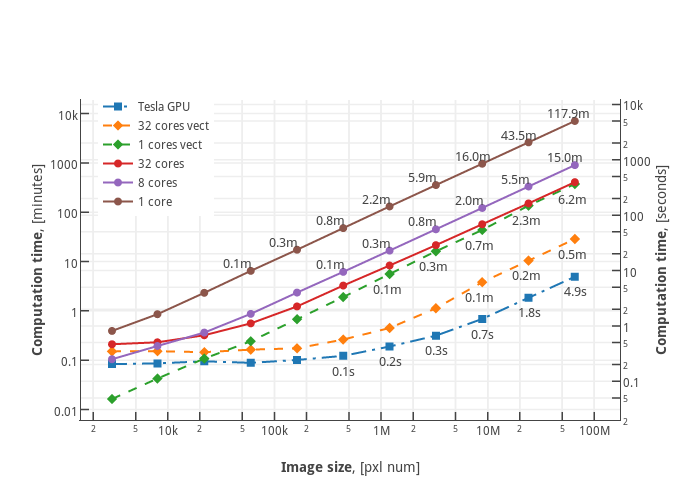

In [105]:
fig_comp_time = py.get_figure('magican', '12')
py.iplot(fig_comp_time, filename='comp_time')

In [106]:
# Saving static image
py.image.save_as(fig_comp_time, 'comp_time.pdf')